<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 2 - Character Generator Model (Problem 2)</h2><h3>AY2020/21 Semester</h3></th>
    </tr>
</table>

### Done by Ng Chin Tiong Ryan (DL02/CSF03)

In [1]:
# Import the Required Packages
# Enter your code here:
from tensorflow import keras
print('keras: ', keras.__version__)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

keras:  2.2.4-tf


## Step 1 – Data Loading and Processing

### 1.1 Data Loading

In [2]:
# read in the text file, transforming everything to lower case
text = open('holmes.txt').read().lower()
print('The original text has ' + str(len(text)) + ' characters.\n')

The original text has 562439 characters.



### 1.2 Data Processing


In [3]:
### print out the first 1000 characters of the raw text to get a sense of what characters to remove
text[:2000]

"ï»¿the adventures of sherlock holmes by sir arthur conan doyle\n\n   i. a scandal in bohemia\n  ii. the red-headed league\n iii. a case of identity\n  iv. the boscombe valley mystery\n   v. the five orange pips\n  vi. the man with the twisted lip\n vii. the adventure of the blue carbuncle\nviii. the adventure of the speckled band\n  ix. the adventure of the engineer's thumb\n   x. the adventure of the noble bachelor\n  xi. the adventure of the beryl coronet\n xii. the adventure of the copper beeches\n\n\nadventure i. a scandal in bohemia\n\ni.\n\nto sherlock holmes she is always the woman. i have seldom heard\nhim mention her under any other name. in his eyes she eclipses\nand predominates the whole of her sex. it was not that he felt\nany emotion akin to love for irene adler. all emotions, and that\none particularly, were abhorrent to his cold, precise but\nadmirably balanced mind. he was, i take it, the most perfect\nreasoning and observing machine that the world has seen, but as a\

In [4]:
# remove all '\n' and '\r' from text
text = text.replace('\n','') 
text = text.replace('\r','')

In [5]:
# create a function 'clean_text' to clean text so that only the following letters and punctation remain
def clean_text(text):
    punctuation = ['!', ',', '.', ':', ';', '?', '-', "'",' ']
    letters='abcdefghijklmnopqrstuvwxyz'
    char_list = ""
    # Enter your code here:
    for i in text:
        if i in punctuation or i in letters:
            char_list += i
    return char_list

In [6]:
# clean data using clean_text function
text = clean_text(text)
text[:2000]

"the adventures of sherlock holmes by sir arthur conan doyle   i. a scandal in bohemia  ii. the red-headed league iii. a case of identity  iv. the boscombe valley mystery   v. the five orange pips  vi. the man with the twisted lip vii. the adventure of the blue carbuncleviii. the adventure of the speckled band  ix. the adventure of the engineer's thumb   x. the adventure of the noble bachelor  xi. the adventure of the beryl coronet xii. the adventure of the copper beechesadventure i. a scandal in bohemiai.to sherlock holmes she is always the woman. i have seldom heardhim mention her under any other name. in his eyes she eclipsesand predominates the whole of her sex. it was not that he feltany emotion akin to love for irene adler. all emotions, and thatone particularly, were abhorrent to his cold, precise butadmirably balanced mind. he was, i take it, the most perfectreasoning and observing machine that the world has seen, but as alover he would have placed himself in a false position. 

In [7]:
# count the number of unique characters in the text
chars = sorted(list(set(text)))
print(chars)
# print some of the text, as well as statistics
print ("This document has " +  str(len(text)) + " total number of characters.")
print ("This document has " +  str(len(chars)) + " unique characters.")

[' ', '!', "'", ',', '-', '.', ':', ';', '?', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
This document has 544340 total number of characters.
This document has 35 unique characters.


In [8]:
# create a function 'generate_text_io' to generate text inputs based on window_size and the corresponding labels
step = 3

def generate_text_io(text, maxlen):
    inputs = [] # store inputs
    labels = [] # stores label
    
    # Enter your code here:
    for i in range(0, len(text) - maxlen, step):
        inputs.append(text[i: i + maxlen]) 
        labels.append(text[i + maxlen])
    print('Number of sequences:', len(inputs))

    # List of unique characters in the corpus
    chars = sorted(list(set(text)))
    print('Unique characters:', len(chars))
    # Dictionary mapping unique characters to their index in `chars`
    char_indices = dict((char, chars.index(char)) for char in chars)
    
    return inputs, labels, char_indices, chars


In [9]:
# this dictionary is a function mapping each unique character to a unique integer
chars_to_indices = dict((c, i) for i, c in enumerate(chars))  # map each unique character to unique integer

# this dictionary is a function mapping each unique integer back to a unique character
indices_to_chars = dict((i, c) for i, c in enumerate(chars))  # map each unique integer back to unique character

In [10]:
import numpy as np

# create a function 'encode_io_pairs' to perform one-hot encoding of inputs and labels
def encode_io_pairs(text, maxlen, inputs): # window_size determines # of characters in each input
    
    # Enter your code here:
    print('Vectorization...')
    x = np.zeros((len(inputs), maxlen, len(chars)), dtype=np.bool)
    y = np.zeros((len(inputs), len(chars)), dtype=np.bool)
    for i, sentence in enumerate(inputs):
        for t, char in enumerate(sentence):
            x[i, t, char_indices[char]] = 1
        y[i, char_indices[labels[i]]] = 1
    return x, y

In [11]:
# perform one-hot encoding of inputs and labels
#window_size = 100 # Models 1-7
#window_size = 200 # Models 8-14
window_size = 300
inputs, labels, char_indices, chars = generate_text_io(text, window_size)
print(inputs[0] + '\n' + labels[0])
X, y = encode_io_pairs(text, window_size, inputs)
print(X[0])
print(y[0])

Number of sequences: 181347
Unique characters: 35
the adventures of sherlock holmes by sir arthur conan doyle   i. a scandal in bohemia  ii. the red-headed league iii. a case of identity  iv. the boscombe valley mystery   v. the five orange pips  vi. the man with the twisted lip vii. the adventure of the blue carbuncleviii. the adventure of the spe
c
Vectorization...
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
[False False False False False False False False False False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False]


### 1.3 Splitting Dataset into Inputs (X) and Labels (y)

In [12]:
# Note: You may choose to perform this step before encoding the data (step 1.2).
# Enter your code here: Refer to top

## Step 2 – Develop a Character Generator Model

In [15]:
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

### Model #1 LSTM RMSprop Base Win Size 100

In [14]:
# Build the Model
# Enter your code here:
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = keras.models.Sequential()
model.add(layers.LSTM(128, input_shape=(window_size, len(chars))))
model.add(layers.Dense(len(chars), activation='softmax'))

optimizer = optimizers.RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               83968     
_________________________________________________________________
dense (Dense)                (None, 35)                4515      
Total params: 88,483
Trainable params: 88,483
Non-trainable params: 0
_________________________________________________________________


epoch 1
Train on 181414 samples
181414/181414 [==============================] - 44s 243us/sample - loss: 2.0077 - acc: 0.4114
--- Generating with seed: "ried words, and then quick stepsupon the linoleum. our own door flew open, and a lady, clad insome d"
------ temperature: 0.2
ried words, and then quick stepsupon the linoleum. our own door flew open, and a lady, clad insome down the tood of the strong and the seart of the lady to the state wo with the shall with her as a station of the stall and to the stoon of the could sat the stain of the shall a chair of the sate of the tood that i was a the some and and as a come and his had and and man and a man of the stant and and the side of the sught to the sate and as and the stain to the steped to the street of the sught t
------ temperature: 0.5
nd the side of the sught to the sate and as and the stain to the steped to the street of the sught to be past which he had all that is a mest it with his read we sat it was to the word of the str

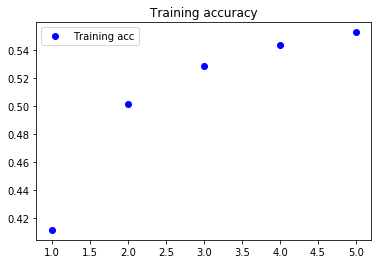

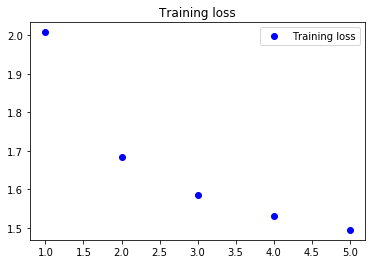

In [15]:
# Train the Model
# Enter your code here:
import random
import sys

acc_list= []
loss_list = []

for epoch in range(1, 6):
    print('epoch', epoch)
    # Fit the model for 1 epoch on the available training data
    history = model.fit(X, y,
              batch_size=128,
              epochs=1)
    acc = history.history['acc']
    loss = history.history['loss']
    acc_list.append(acc)
    loss_list.append(loss)
    
    # Select a text seed at random
    start_index = random.randint(0, len(text) - window_size - 1)
    generated_text = text[start_index: start_index + window_size]
    print('--- Generating with seed: "' + generated_text + '"')
   
    
    for temperature in [0.2, 0.5, 1.0, 1.2]:
        print('------ temperature:', temperature)
        sys.stdout.write(generated_text)

        # We generate 400 characters
        for i in range(400):
            sampled = np.zeros((1, window_size, len(chars)))
            for t, char in enumerate(generated_text):
                sampled[0, t, char_indices[char]] = 1.

            preds = model.predict(sampled, verbose=0)[0]
            next_index = sample(preds, temperature)
            next_char = chars[next_index]

            generated_text += next_char
            generated_text = generated_text[1:]

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()


graph_acc = []
for i in acc_list:
    for j in i:
        graph_acc.append(j)
        
graph_loss = []
for i in loss_list:
    for j in i:
        graph_loss.append(j)
    
#Plotting training graphs
%matplotlib inline
import matplotlib.pyplot as plt

epochs = range(1, len(graph_acc) + 1)

plt.plot(epochs, graph_acc, 'bo', label='Training acc')
plt.title('Training accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, graph_loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [16]:
# Save the Model
model.save('chgen_model_1.h5')

### Model #2 LSTM RMSprop Add layer Win Size 100

In [17]:
# Build the Model
# Enter your code here:
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = keras.models.Sequential()
model.add(layers.LSTM(128, return_sequences=True, input_shape=(window_size, len(chars))))
model.add(layers.LSTM(128))
model.add(layers.Dense(len(chars), activation='softmax'))

optimizer = optimizers.RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100, 128)          83968     
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 35)                4515      
Total params: 220,067
Trainable params: 220,067
Non-trainable params: 0
_________________________________________________________________


epoch 1
Train on 181414 samples
181414/181414 [==============================] - 50s 275us/sample - loss: 2.2264 - acc: 0.3540
--- Generating with seed: "arked.not invisible but unnoticed, watson. you did not know where tolook, and so you missed all that"
------ temperature: 0.2
arked.not invisible but unnoticed, watson. you did not know where tolook, and so you missed all that i had the stroster to the onder the stare to the sto the steen to the streare to the stood to the strouse to the strange to the strester the stood of the tome the stross of the comether the stered to the strest of the strearly and the strester the strester the sterle to my one to the farter to the strark of the may the strest of the stare to the street as the strare of the had the stare in the st
------ temperature: 0.5
strark of the may the strest of the stare to the street as the strare of the had the stare in the stremestand as to the onfitter of the cometome my to the some it asket of the could he head, when

D:\Users\maste\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


commen,one recent our feeting the sweaspyaster?wnoggave buck iquemh faster his hand. you will very fire
epoch 5
Train on 181414 samples
181414/181414 [==============================] - 52s 286us/sample - loss: 1.5706 - acc: 0.5350
--- Generating with seed: "n which has been offeredto me as governess. i shall call at half-past ten to-morrow if ido not incon"
------ temperature: 0.2
n which has been offeredto me as governess. i shall call at half-past ten to-morrow if ido not inconsiderably the word the stark the word the story the case and the passed the step in the steee the strange and the case the commanted the word the stepfice and my case that i have been step the case that i have been consel that i have been the strange and when i have been and man and the strange and the way to have had seven such a case and my commantion and the commanted the start the stark the wo
------ temperature: 0.5
the way to have had seven such a case and my commantion and the commanted the start the sta

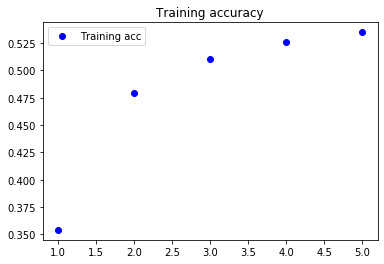

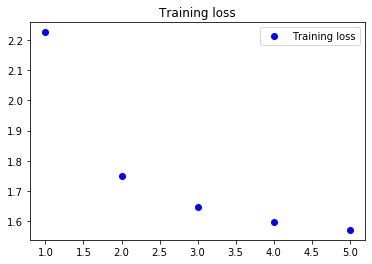

In [18]:
# Train the Model
# Enter your code here:
import random
import sys

acc_list= []
loss_list = []

for epoch in range(1, 6):
    print('epoch', epoch)
    # Fit the model for 1 epoch on the available training data
    history = model.fit(X, y,
              batch_size=128,
              epochs=1)
    acc = history.history['acc']
    loss = history.history['loss']
    acc_list.append(acc)
    loss_list.append(loss)
    
    # Select a text seed at random
    start_index = random.randint(0, len(text) - window_size - 1)
    generated_text = text[start_index: start_index + window_size]
    print('--- Generating with seed: "' + generated_text + '"')
   
    
    for temperature in [0.2, 0.5, 1.0, 1.2]:
        print('------ temperature:', temperature)
        sys.stdout.write(generated_text)

        # We generate 400 characters
        for i in range(400):
            sampled = np.zeros((1, window_size, len(chars)))
            for t, char in enumerate(generated_text):
                sampled[0, t, char_indices[char]] = 1.

            preds = model.predict(sampled, verbose=0)[0]
            next_index = sample(preds, temperature)
            next_char = chars[next_index]

            generated_text += next_char
            generated_text = generated_text[1:]

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()


graph_acc = []
for i in acc_list:
    for j in i:
        graph_acc.append(j)
        
graph_loss = []
for i in loss_list:
    for j in i:
        graph_loss.append(j)
    
#Plotting training graphs
%matplotlib inline
import matplotlib.pyplot as plt

epochs = range(1, len(graph_acc) + 1)

plt.plot(epochs, graph_acc, 'bo', label='Training acc')
plt.title('Training accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, graph_loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [19]:
# Save the Model
model.save('chgen_model_2.h5')

### Model #3 LSTM Adam Base Win Size 100

In [21]:
# Build the Model
# Enter your code here:
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = keras.models.Sequential()
model.add(layers.LSTM(128, input_shape=(window_size, len(chars))))
model.add(layers.Dense(len(chars), activation='softmax'))

optimizer = optimizers.Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 128)               83968     
_________________________________________________________________
dense_2 (Dense)              (None, 35)                4515      
Total params: 88,483
Trainable params: 88,483
Non-trainable params: 0
_________________________________________________________________


epoch 1
Train on 181414 samples
181414/181414 [==============================] - 29s 157us/sample - loss: 2.0413 - acc: 0.4034
--- Generating with seed: "wadding and carbolised bandages. he lay backwithout wincing, though he bit his lip from time to time"
------ temperature: 0.2
wadding and carbolised bandages. he lay backwithout wincing, though he bit his lip from time to time the man and the man her the streen the come the starr the stare the starr the stare and the manter to the starred the starred the concersed the concered the onther the stare the concering the starred the stare the stare in the starred the starr the mand of the farsed to the starr and the stare in the was in the streen to the starred the streared the manter the stare in the starred the concering o
------ temperature: 0.5
he was in the streen to the starred the streared the manter the stare in the starred the concering of the sime to the conding the my fade, one for he said his reares, and with a the intered that 

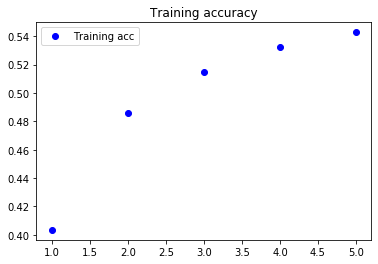

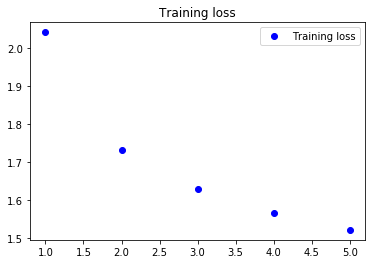

In [22]:
# Train the Model
# Enter your code here:
import random
import sys

acc_list= []
loss_list = []

for epoch in range(1, 6):
    print('epoch', epoch)
    # Fit the model for 1 epoch on the available training data
    history = model.fit(X, y,
              batch_size=128,
              epochs=1)
    acc = history.history['acc']
    loss = history.history['loss']
    acc_list.append(acc)
    loss_list.append(loss)
    
    # Select a text seed at random
    start_index = random.randint(0, len(text) - window_size - 1)
    generated_text = text[start_index: start_index + window_size]
    print('--- Generating with seed: "' + generated_text + '"')
   
    
    for temperature in [0.2, 0.5, 1.0, 1.2]:
        print('------ temperature:', temperature)
        sys.stdout.write(generated_text)

        # We generate 400 characters
        for i in range(400):
            sampled = np.zeros((1, window_size, len(chars)))
            for t, char in enumerate(generated_text):
                sampled[0, t, char_indices[char]] = 1.

            preds = model.predict(sampled, verbose=0)[0]
            next_index = sample(preds, temperature)
            next_char = chars[next_index]

            generated_text += next_char
            generated_text = generated_text[1:]

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()


graph_acc = []
for i in acc_list:
    for j in i:
        graph_acc.append(j)
        
graph_loss = []
for i in loss_list:
    for j in i:
        graph_loss.append(j)
    
#Plotting training graphs
%matplotlib inline
import matplotlib.pyplot as plt

epochs = range(1, len(graph_acc) + 1)

plt.plot(epochs, graph_acc, 'bo', label='Training acc')
plt.title('Training accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, graph_loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [23]:
# Save the Model
model.save('chgen_model_3.h5')

### Model #4 LSTM Adam Add layer, increase lr Win Size 100

In [26]:
# Build the Model
# Enter your code here:
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = keras.models.Sequential()
model.add(layers.LSTM(64, return_sequences=True, input_shape=(window_size, len(chars))))
model.add(layers.LSTM(64))
model.add(layers.Dense(len(chars), activation='softmax'))

optimizer = optimizers.Adam(lr=0.05)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 100, 64)           25600     
_________________________________________________________________
lstm_9 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_4 (Dense)              (None, 35)                2275      
Total params: 60,899
Trainable params: 60,899
Non-trainable params: 0
_________________________________________________________________


epoch 1
Train on 181414 samples
181414/181414 [==============================] - 32s 176us/sample - loss: 2.1146 - acc: 0.3790
--- Generating with seed: "ppears to have had little of his own, and to havebeen under such obligations to turner, should still"
------ temperature: 0.2
ppears to have had little of his own, and to havebeen under such obligations to turner, should still to compler to word to is and the mare to which the forer with the the boour the mare to the the the wood to the will the was the mare to the was have the wood to which the mare in the wood the the wood to mare to the mare and to the mare the bore the was the mare to the mare with the poour to the boour the the will to the was have word the wood to the wood and and the wood the mare in the was the
------ temperature: 0.5
oour the the will to the was have word the wood to the wood and and the wood the mare in the was the it could and been ornow, but and with the door with i at up with and becare, and being in the 

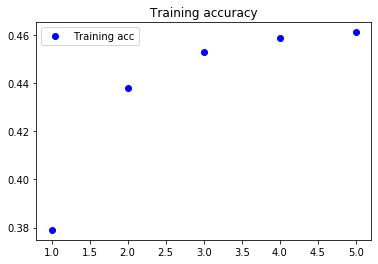

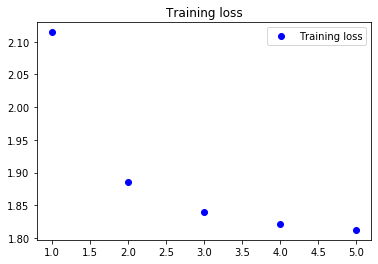

In [27]:
# Train the Model
# Enter your code here:
import random
import sys

acc_list= []
loss_list = []

for epoch in range(1, 6):
    print('epoch', epoch)
    # Fit the model for 1 epoch on the available training data
    history = model.fit(X, y,
              batch_size=128,
              epochs=1)
    acc = history.history['acc']
    loss = history.history['loss']
    acc_list.append(acc)
    loss_list.append(loss)
    
    # Select a text seed at random
    start_index = random.randint(0, len(text) - window_size - 1)
    generated_text = text[start_index: start_index + window_size]
    print('--- Generating with seed: "' + generated_text + '"')
   
    
    for temperature in [0.2, 0.5, 1.0, 1.2]:
        print('------ temperature:', temperature)
        sys.stdout.write(generated_text)

        # We generate 400 characters
        for i in range(400):
            sampled = np.zeros((1, window_size, len(chars)))
            for t, char in enumerate(generated_text):
                sampled[0, t, char_indices[char]] = 1.

            preds = model.predict(sampled, verbose=0)[0]
            next_index = sample(preds, temperature)
            next_char = chars[next_index]

            generated_text += next_char
            generated_text = generated_text[1:]

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()


graph_acc = []
for i in acc_list:
    for j in i:
        graph_acc.append(j)
        
graph_loss = []
for i in loss_list:
    for j in i:
        graph_loss.append(j)
    
#Plotting training graphs
%matplotlib inline
import matplotlib.pyplot as plt

epochs = range(1, len(graph_acc) + 1)

plt.plot(epochs, graph_acc, 'bo', label='Training acc')
plt.title('Training accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, graph_loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [28]:
# Save the Model
model.save('chgen_model_4.h5')

### Model #5 GRU RMSprop Base Win Size 100

In [14]:
# Build the Model
# Enter your code here:
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = keras.models.Sequential()
model.add(layers.GRU(128, input_shape=(window_size, len(chars))))
model.add(layers.Dense(len(chars), activation='softmax'))

optimizer = optimizers.RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 128)               63360     
_________________________________________________________________
dense (Dense)                (None, 35)                4515      
Total params: 67,875
Trainable params: 67,875
Non-trainable params: 0
_________________________________________________________________


epoch 1
Train on 181414 samples
181414/181414 [==============================] - 35s 191us/sample - loss: 1.9674 - acc: 0.4231
--- Generating with seed: "ld not have thoughtthere were so many in the whole country as were brought togetherby that single ad"
------ temperature: 0.2
ld not have thoughtthere were so many in the whole country as were brought togetherby that single ad to the stronged that i conforning to the conting to the conside of the sone in the stoon on the morning been to the morning and were the stone and before my man that i seal not heard that in the conside of the conside of the conting that i have been but then in the conside to the conside of the conside of the conside of the conside to the man that i have not been the conside of the consides whone
------ temperature: 0.5
side of the conside of the conside to the man that i have not been the conside of the consides whones on the crost on the crases, wasnessing side for then then to my one which the mare that he my

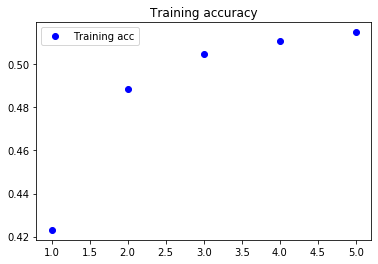

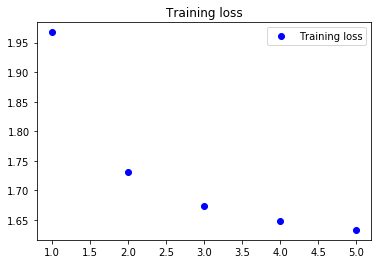

In [15]:
# Train the Model
# Enter your code here:
import random
import sys

acc_list= []
loss_list = []

for epoch in range(1, 6):
    print('epoch', epoch)
    # Fit the model for 1 epoch on the available training data
    history = model.fit(X, y,
              batch_size=128,
              epochs=1)
    acc = history.history['acc']
    loss = history.history['loss']
    acc_list.append(acc)
    loss_list.append(loss)
    
    # Select a text seed at random
    start_index = random.randint(0, len(text) - window_size - 1)
    generated_text = text[start_index: start_index + window_size]
    print('--- Generating with seed: "' + generated_text + '"')
   
    
    for temperature in [0.2, 0.5, 1.0, 1.2]:
        print('------ temperature:', temperature)
        sys.stdout.write(generated_text)

        # We generate 400 characters
        for i in range(400):
            sampled = np.zeros((1, window_size, len(chars)))
            for t, char in enumerate(generated_text):
                sampled[0, t, char_indices[char]] = 1.

            preds = model.predict(sampled, verbose=0)[0]
            next_index = sample(preds, temperature)
            next_char = chars[next_index]

            generated_text += next_char
            generated_text = generated_text[1:]

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()


graph_acc = []
for i in acc_list:
    for j in i:
        graph_acc.append(j)
        
graph_loss = []
for i in loss_list:
    for j in i:
        graph_loss.append(j)
    
#Plotting training graphs
%matplotlib inline
import matplotlib.pyplot as plt

epochs = range(1, len(graph_acc) + 1)

plt.plot(epochs, graph_acc, 'bo', label='Training acc')
plt.title('Training accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, graph_loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [16]:
# Save the Model
model.save('chgen_model_5.h5')

### Model #6 GRU RMSprop add layer & dropout Win Size 100

In [21]:
# Build the Model
# Enter your code here:
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = keras.models.Sequential()
model.add(layers.GRU(128,return_sequences=True, input_shape=(window_size, len(chars))))
model.add(layers.GRU(64, dropout = 0.1, recurrent_dropout = 0.1))
model.add(layers.Dense(len(chars), activation='softmax'))

optimizer = optimizers.RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_5 (GRU)                  (None, 100, 128)          63360     
_________________________________________________________________
gru_6 (GRU)                  (None, 64)                37248     
_________________________________________________________________
dense_3 (Dense)              (None, 35)                2275      
Total params: 102,883
Trainable params: 102,883
Non-trainable params: 0
_________________________________________________________________


epoch 1
Train on 181414 samples
181414/181414 [==============================] - 257s 1ms/sample - loss: 2.0653 - acc: 0.3958
--- Generating with seed: "ad remained when the stripped body had been suckedaway into the river.but i understand that all the "
------ temperature: 0.2
ad remained when the stripped body had been suckedaway into the river.but i understand that all the side to the side to the side to the side to the side to the side to the sidning to the side to the side to the side to the side to the same to the dead to the sidning to the side, i shall in the comple to the see to the side to the sidning to the sop the servent in the some to the sidning to the comple to the side to the side to the sidning to the side to the sidning to the seen to the deached to 
------ temperature: 0.5
ple to the side to the side to the sidning to the side to the sidning to the seen to the deached to me to the caster me she to the rettorned be to the side to my sud to the compent in the condon t

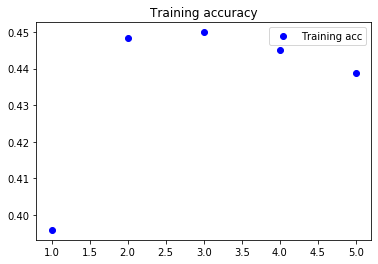

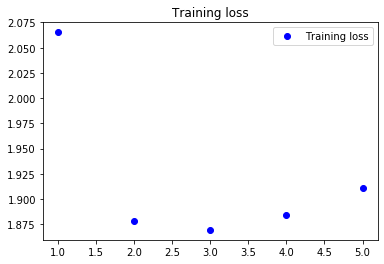

In [22]:
# Train the Model
# Enter your code here:
import random
import sys

acc_list= []
loss_list = []

for epoch in range(1, 6):
    print('epoch', epoch)
    # Fit the model for 1 epoch on the available training data
    history = model.fit(X, y,
              batch_size=128,
              epochs=1)
    acc = history.history['acc']
    loss = history.history['loss']
    acc_list.append(acc)
    loss_list.append(loss)
    
    # Select a text seed at random
    start_index = random.randint(0, len(text) - window_size - 1)
    generated_text = text[start_index: start_index + window_size]
    print('--- Generating with seed: "' + generated_text + '"')
   
    
    for temperature in [0.2, 0.5, 1.0, 1.2]:
        print('------ temperature:', temperature)
        sys.stdout.write(generated_text)

        # We generate 400 characters
        for i in range(400):
            sampled = np.zeros((1, window_size, len(chars)))
            for t, char in enumerate(generated_text):
                sampled[0, t, char_indices[char]] = 1.

            preds = model.predict(sampled, verbose=0)[0]
            next_index = sample(preds, temperature)
            next_char = chars[next_index]

            generated_text += next_char
            generated_text = generated_text[1:]

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()


graph_acc = []
for i in acc_list:
    for j in i:
        graph_acc.append(j)
        
graph_loss = []
for i in loss_list:
    for j in i:
        graph_loss.append(j)
    
#Plotting training graphs
%matplotlib inline
import matplotlib.pyplot as plt

epochs = range(1, len(graph_acc) + 1)

plt.plot(epochs, graph_acc, 'bo', label='Training acc')
plt.title('Training accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, graph_loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [23]:
# Save the Model
model.save('chgen_model_6.h5')

### Model #7 GRU Adam Win Size 100

In [14]:
# Build the Model
# Enter your code here:
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = keras.models.Sequential()
model.add(layers.GRU(128, input_shape=(window_size, len(chars))))
model.add(layers.Dense(len(chars), activation='softmax'))

optimizer = optimizers.Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 128)               63360     
_________________________________________________________________
dense (Dense)                (None, 35)                4515      
Total params: 67,875
Trainable params: 67,875
Non-trainable params: 0
_________________________________________________________________


epoch 1
Train on 181414 samples
181414/181414 [==============================] - 39s 215us/sample - loss: 1.9742 - acc: 0.4187
--- Generating with seed: "drooms opened. holmes refused to examine the thirdchamber, so we passed at once to the second, that "
------ temperature: 0.2
drooms opened. holmes refused to examine the thirdchamber, so we passed at once to the second, that i was a little of the liet of the listle starce, and the cried, and i was a little to the more and the one one of the little that i was and the little to the light in the out the certance of the light in the care and it is a seet in the little to the certant of the little that i was a mone and it is a more and the room and the clain. i was a seet in the colon the light on the might in the little t
------ temperature: 0.5
 a more and the room and the clain. i was a seet in the colon the light on the might in the little to a sice, and i was an to the seet our an in the operong in which as we to the light and and a 

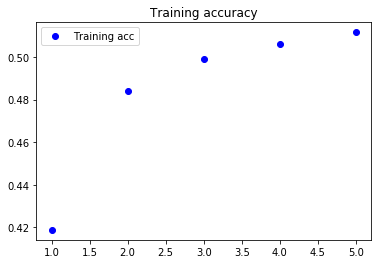

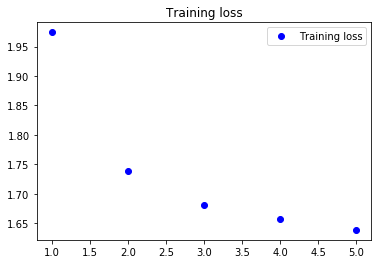

In [15]:
# Train the Model
# Enter your code here:
import random
import sys

acc_list= []
loss_list = []

for epoch in range(1, 6):
    print('epoch', epoch)
    # Fit the model for 1 epoch on the available training data
    history = model.fit(X, y,
              batch_size=128,
              epochs=1)
    acc = history.history['acc']
    loss = history.history['loss']
    acc_list.append(acc)
    loss_list.append(loss)
    
    # Select a text seed at random
    start_index = random.randint(0, len(text) - window_size - 1)
    generated_text = text[start_index: start_index + window_size]
    print('--- Generating with seed: "' + generated_text + '"')
   
    
    for temperature in [0.2, 0.5, 1.0, 1.2]:
        print('------ temperature:', temperature)
        sys.stdout.write(generated_text)

        # We generate 400 characters
        for i in range(400):
            sampled = np.zeros((1, window_size, len(chars)))
            for t, char in enumerate(generated_text):
                sampled[0, t, char_indices[char]] = 1.

            preds = model.predict(sampled, verbose=0)[0]
            next_index = sample(preds, temperature)
            next_char = chars[next_index]

            generated_text += next_char
            generated_text = generated_text[1:]

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()


graph_acc = []
for i in acc_list:
    for j in i:
        graph_acc.append(j)
        
graph_loss = []
for i in loss_list:
    for j in i:
        graph_loss.append(j)
    
#Plotting training graphs
%matplotlib inline
import matplotlib.pyplot as plt

epochs = range(1, len(graph_acc) + 1)

plt.plot(epochs, graph_acc, 'bo', label='Training acc')
plt.title('Training accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, graph_loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [16]:
# Save the Model
model.save('chgen_model_7.h5')

---
### Demarc Line: Win Size 200
---

### Model #8 LSTM RMSprop Base Win Size 200

In [18]:
# Build the Model
# Enter your code here:
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = keras.models.Sequential()
model.add(layers.LSTM(128, input_shape=(window_size, len(chars))))
model.add(layers.Dense(len(chars), activation='softmax'))

optimizer = optimizers.RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               83968     
_________________________________________________________________
dense_1 (Dense)              (None, 35)                4515      
Total params: 88,483
Trainable params: 88,483
Non-trainable params: 0
_________________________________________________________________


epoch 1
Train on 181380 samples
181380/181380 [==============================] - 48s 266us/sample - loss: 1.9948 - acc: 0.4173
--- Generating with seed: "s, withthree of the beryls in it, was missing.'you blackguard!' i shouted, beside myself with rage. 'you havedestroyed it! you have dishonoured me forever! where are thejewels which you have stolen?''"
------ temperature: 0.2
s, withthree of the beryls in it, was missing.'you blackguard!' i shouted, beside myself with rage. 'you havedestroyed it! you have dishonoured me forever! where are thejewels which you have stolen?'' i can he would be the see the could of the manker the seet with my and in a seen a man in the man a chanked the man a could me the seemed that the man out the man the seen and stank it was a could a lent of the man of the are a was a a the seen a could her her out a long a could be a league and the lenger and a shall the seet a lead a man a lead and a leak of the seemed of the seenthe could her w
------ temperature:

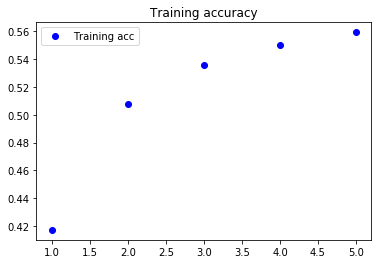

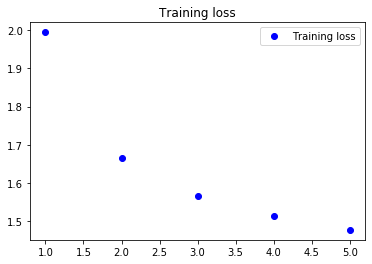

In [19]:
# Train the Model
# Enter your code here:
import random
import sys

acc_list= []
loss_list = []

for epoch in range(1, 6):
    print('epoch', epoch)
    # Fit the model for 1 epoch on the available training data
    history = model.fit(X, y,
              batch_size=128,
              epochs=1)
    acc = history.history['acc']
    loss = history.history['loss']
    acc_list.append(acc)
    loss_list.append(loss)
    
    # Select a text seed at random
    start_index = random.randint(0, len(text) - window_size - 1)
    generated_text = text[start_index: start_index + window_size]
    print('--- Generating with seed: "' + generated_text + '"')
   
    
    for temperature in [0.2, 0.5, 1.0, 1.2]:
        print('------ temperature:', temperature)
        sys.stdout.write(generated_text)

        # We generate 400 characters
        for i in range(400):
            sampled = np.zeros((1, window_size, len(chars)))
            for t, char in enumerate(generated_text):
                sampled[0, t, char_indices[char]] = 1.

            preds = model.predict(sampled, verbose=0)[0]
            next_index = sample(preds, temperature)
            next_char = chars[next_index]

            generated_text += next_char
            generated_text = generated_text[1:]

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()


graph_acc = []
for i in acc_list:
    for j in i:
        graph_acc.append(j)
        
graph_loss = []
for i in loss_list:
    for j in i:
        graph_loss.append(j)
    
#Plotting training graphs
%matplotlib inline
import matplotlib.pyplot as plt

epochs = range(1, len(graph_acc) + 1)

plt.plot(epochs, graph_acc, 'bo', label='Training acc')
plt.title('Training accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, graph_loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [20]:
# Save the Model
model.save('chgen_model_8.h5')

### Model #9 LSTM RMSprop Change lr, add dropout Win Size 200

In [27]:
# Build the Model
# Enter your code here:
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = keras.models.Sequential()
model.add(layers.LSTM(128, dropout = 0.005, recurrent_dropout = 0.005, input_shape=(window_size, len(chars))))
model.add(layers.Dense(len(chars), activation='softmax'))

optimizer = optimizers.RMSprop(lr=0.05)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 128)               83968     
_________________________________________________________________
dense_5 (Dense)              (None, 35)                4515      
Total params: 88,483
Trainable params: 88,483
Non-trainable params: 0
_________________________________________________________________


epoch 1
Train on 181380 samples
181380/181380 [==============================] - 476s 3ms/sample - loss: 2.2006 - acc: 0.3768
--- Generating with seed: " i thought that i wasnot to have the vacancy after all; but after thinking it over fora few minutes he said that it would be all right.'in the case of another,' said he, 'the objection might befatal, "
------ temperature: 0.2
 i thought that i wasnot to have the vacancy after all; but after thinking it over fora few minutes he said that it would be all right.'in the case of another,' said he, 'the objection might befatal, and the street the street be seet we seet we sond seen the streen into the stangen sone the street from the seet and seet we say be the stane the stong the street and seen seen the son the street seen her seen the street we sond the stane and sone the stank the street of the street we sond the street and the seet a stense and sone the stank the stence we shang sone my streen the street we sond the
------ temperature: 

D:\Users\maste\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


the the lander he wood the somy and the one ore of he somety had be her stectered the the che sher the madyes said the had be heeeen shered the made he troohe areest and the he somety of he mon the down and the stereded the could of steped the some he hearded and teper the sooe he wase of the sooe he sometyed he hach heard be he had be here had be her stetes
------ temperature: 0.5
reest and the he somety of he mon the down and the stereded the could of steped the some he hearded and teper the sooe he wase of the sooe he sometyed he hach heard be he had be here had be her stetes bey and cry been the bele thises of the calleinessed.and the door?the alellerded esbe's oned but the tryound her be beyethe be nethinkave her reathe by it holhnlo seen he mandouseinted in are thatter and the we aloked that her beri one his pan ther sherted of the sadpe and t?in. inseade my say stekett the door?the whe conted com by bewen bether alieo a ledhere a lando soly srem say steping in ard
------ tempera

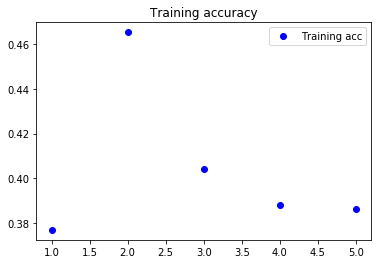

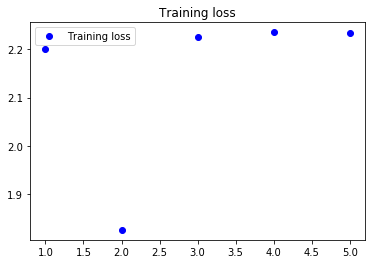

In [28]:
# Train the Model
# Enter your code here:
import random
import sys

acc_list= []
loss_list = []

for epoch in range(1, 6):
    print('epoch', epoch)
    # Fit the model for 1 epoch on the available training data
    history = model.fit(X, y,
              batch_size=128,
              epochs=1)
    acc = history.history['acc']
    loss = history.history['loss']
    acc_list.append(acc)
    loss_list.append(loss)
    
    # Select a text seed at random
    start_index = random.randint(0, len(text) - window_size - 1)
    generated_text = text[start_index: start_index + window_size]
    print('--- Generating with seed: "' + generated_text + '"')
   
    
    for temperature in [0.2, 0.5, 1.0, 1.2]:
        print('------ temperature:', temperature)
        sys.stdout.write(generated_text)

        # We generate 400 characters
        for i in range(400):
            sampled = np.zeros((1, window_size, len(chars)))
            for t, char in enumerate(generated_text):
                sampled[0, t, char_indices[char]] = 1.

            preds = model.predict(sampled, verbose=0)[0]
            next_index = sample(preds, temperature)
            next_char = chars[next_index]

            generated_text += next_char
            generated_text = generated_text[1:]

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()


graph_acc = []
for i in acc_list:
    for j in i:
        graph_acc.append(j)
        
graph_loss = []
for i in loss_list:
    for j in i:
        graph_loss.append(j)
    
#Plotting training graphs
%matplotlib inline
import matplotlib.pyplot as plt

epochs = range(1, len(graph_acc) + 1)

plt.plot(epochs, graph_acc, 'bo', label='Training acc')
plt.title('Training accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, graph_loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [29]:
# Save the Model
model.save('chgen_model_9.h5')

### Model #10 LSTM Adam Base Win Size 200

In [59]:
# Build the Model
# Enter your code here:
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = keras.models.Sequential()
model.add(layers.LSTM(256, input_shape=(window_size, len(chars))))
model.add(layers.Dense(len(chars), activation='softmax'))

optimizer = optimizers.Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 256)               299008    
_________________________________________________________________
dense_2 (Dense)              (None, 35)                8995      
Total params: 308,003
Trainable params: 308,003
Non-trainable params: 0
_________________________________________________________________


epoch 1
Train on 181380 samples
181380/181380 [==============================] - 90s 496us/sample - loss: 2.1198 - acc: 0.3795 - loss: 2.1217 - a
--- Generating with seed: "nd whowas it brought him the coronet?it is an old maxim of mine that when you have excluded theimpossible, whatever remains, however improbable, must be thetruth. now, i knew that it was not you who h"
------ temperature: 0.2
nd whowas it brought him the coronet?it is an old maxim of mine that when you have excluded theimpossible, whatever remains, however improbable, must be thetruth. now, i knew that it was not you who have the poor and the staps and the condertall to his and the have and the steps was a sad and the pook and the stand the fore the staps the come the stare said and the door to the stard and the door and her and the stard to have the reating the stard the down the fore and the stans the star to the said and the stape and the stard and the read and the room the stard the sight the for and the stare 


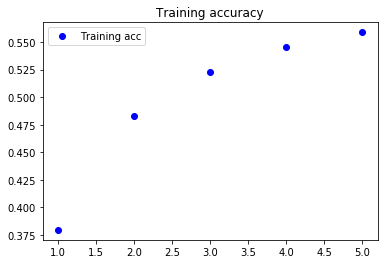

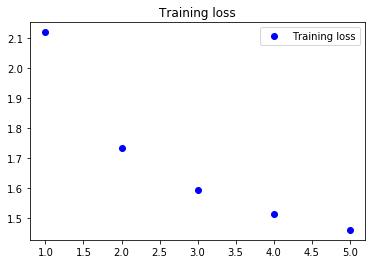

In [60]:
# Train the Model
# Enter your code here:
import random
import sys

acc_list= []
loss_list = []

for epoch in range(1, 6):
    print('epoch', epoch)
    # Fit the model for 1 epoch on the available training data
    history = model.fit(X, y,
              batch_size=128,
              epochs=1)
    acc = history.history['acc']
    loss = history.history['loss']
    acc_list.append(acc)
    loss_list.append(loss)
    
    # Select a text seed at random
    start_index = random.randint(0, len(text) - window_size - 1)
    generated_text = text[start_index: start_index + window_size]
    print('--- Generating with seed: "' + generated_text + '"')
   
    
    for temperature in [0.2, 0.5, 1.0, 1.2]:
        print('------ temperature:', temperature)
        sys.stdout.write(generated_text)

        # We generate 400 characters
        for i in range(400):
            sampled = np.zeros((1, window_size, len(chars)))
            for t, char in enumerate(generated_text):
                sampled[0, t, char_indices[char]] = 1.

            preds = model.predict(sampled, verbose=0)[0]
            next_index = sample(preds, temperature)
            next_char = chars[next_index]

            generated_text += next_char
            generated_text = generated_text[1:]

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()


graph_acc = []
for i in acc_list:
    for j in i:
        graph_acc.append(j)
        
graph_loss = []
for i in loss_list:
    for j in i:
        graph_loss.append(j)
    
#Plotting training graphs
%matplotlib inline
import matplotlib.pyplot as plt

epochs = range(1, len(graph_acc) + 1)

plt.plot(epochs, graph_acc, 'bo', label='Training acc')
plt.title('Training accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, graph_loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [61]:
# Save the Model
model.save('chgen_model_10.h5')

### Model #11 LSTM Adam change lr Win Size 200

In [64]:
# Build the Model
# Enter your code here:
from tensorflow.keras import layers
from tensorflow.keras import optimizers,regularizers

model = keras.models.Sequential()
model.add(layers.LSTM(256,kernel_regularizer=regularizers.l1(0.001),input_shape=(window_size, len(chars))))
model.add(layers.Dense(len(chars), activation='softmax'))

optimizer = optimizers.Adam(lr=0.05)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 256)               299008    
_________________________________________________________________
dense_4 (Dense)              (None, 35)                8995      
Total params: 308,003
Trainable params: 308,003
Non-trainable params: 0
_________________________________________________________________


epoch 1
Train on 181380 samples
181380/181380 [==============================] - 100s 550us/sample - loss: 3.3667 - acc: 0.1501
--- Generating with seed: "as you will readily see, a possession of allknowledge, which, even in these days of free education andencyclopaedias, is a somewhat rare accomplishment. it is not soimpossible, however, that a man sho"
------ temperature: 0.2
as you will readily see, a possession of allknowledge, which, even in these days of free education andencyclopaedias, is a somewhat rare accomplishment. it is not soimpossible, however, that a man shollllll lll ll llllll llllllllllllllll illillllllllllllllll  llllll llll lllillll ll  lllll   m llllrllill lllrllllllll lllmlllllll lllllllilllilll lll l  l llll llllllli lllillllilll lil lllll lllll lli l llll  ll lli  llllllll llll llll lll  lll rlll llllllilll lll lil  llllllllllllllll  lllllll  iill  llll lll lllhllll lll lil lll llll rlli l llil l lllll  ll llli l llllll  l  lll lllllllll   ll
------ temperature

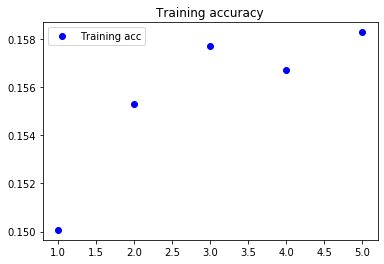

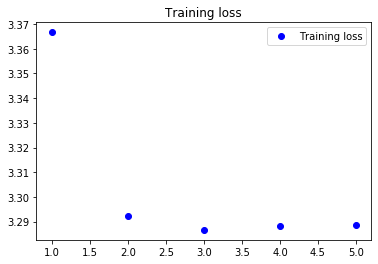

In [65]:
# Train the Model
# Enter your code here:
import random
import sys

acc_list= []
loss_list = []

for epoch in range(1, 6):
    print('epoch', epoch)
    # Fit the model for 1 epoch on the available training data
    history = model.fit(X, y,
              batch_size=128,
              epochs=1)
    acc = history.history['acc']
    loss = history.history['loss']
    acc_list.append(acc)
    loss_list.append(loss)
    
    # Select a text seed at random
    start_index = random.randint(0, len(text) - window_size - 1)
    generated_text = text[start_index: start_index + window_size]
    print('--- Generating with seed: "' + generated_text + '"')
   
    
    for temperature in [0.2, 0.5, 1.0, 1.2]:
        print('------ temperature:', temperature)
        sys.stdout.write(generated_text)

        # We generate 400 characters
        for i in range(400):
            sampled = np.zeros((1, window_size, len(chars)))
            for t, char in enumerate(generated_text):
                sampled[0, t, char_indices[char]] = 1.

            preds = model.predict(sampled, verbose=0)[0]
            next_index = sample(preds, temperature)
            next_char = chars[next_index]

            generated_text += next_char
            generated_text = generated_text[1:]

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()


graph_acc = []
for i in acc_list:
    for j in i:
        graph_acc.append(j)
        
graph_loss = []
for i in loss_list:
    for j in i:
        graph_loss.append(j)
    
#Plotting training graphs
%matplotlib inline
import matplotlib.pyplot as plt

epochs = range(1, len(graph_acc) + 1)

plt.plot(epochs, graph_acc, 'bo', label='Training acc')
plt.title('Training accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, graph_loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [66]:
# Save the Model
model.save('chgen_model_11.h5')

### Model #12 LSTM RMSprop change lr Win Size 200

In [69]:
# Build the Model
# Enter your code here:
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = keras.models.Sequential()
model.add(layers.LSTM(512, input_shape=(window_size, len(chars))))
model.add(layers.Dense(len(chars), activation='softmax'))

optimizer = optimizers.RMSprop(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 512)               1122304   
_________________________________________________________________
dense_6 (Dense)              (None, 35)                17955     
Total params: 1,140,259
Trainable params: 1,140,259
Non-trainable params: 0
_________________________________________________________________


epoch 1
Train on 181380 samples
181380/181380 [==============================] - 254s 1ms/sample - loss: 2.2931 - acc: 0.3392
--- Generating with seed: "nk, misshunter, that we had better go in without you. now, watson, putyour shoulder to it, and we shall see whether we cannot make ourway in.it was an old rickety door and gave at once before our unit"
------ temperature: 0.2
nk, misshunter, that we had better go in without you. now, watson, putyour shoulder to it, and we shall see whether we cannot make ourway in.it was an old rickety door and gave at once before our unit in the ate to her the sed of the coured and and and his been the store and and here sean the reaned and and and wish whine the read to me to and and and had been the reand and hed been to and and and in and and and and and and and and and and and and was and and been the singed to ming and and and and and and and and and and and and in the singed and he as in and of the reaned and the reared then
------ temperature: 

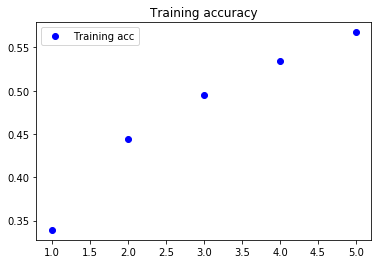

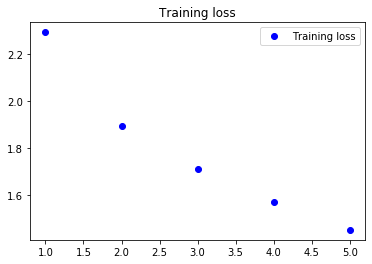

In [70]:
# Train the Model
# Enter your code here:
import random
import sys

acc_list= []
loss_list = []

for epoch in range(1, 6):
    print('epoch', epoch)
    # Fit the model for 1 epoch on the available training data
    history = model.fit(X, y,
              batch_size=128,
              epochs=1)
    acc = history.history['acc']
    loss = history.history['loss']
    acc_list.append(acc)
    loss_list.append(loss)
    
    # Select a text seed at random
    start_index = random.randint(0, len(text) - window_size - 1)
    generated_text = text[start_index: start_index + window_size]
    print('--- Generating with seed: "' + generated_text + '"')
   
    
    for temperature in [0.2, 0.5, 1.0, 1.2]:
        print('------ temperature:', temperature)
        sys.stdout.write(generated_text)

        # We generate 400 characters
        for i in range(400):
            sampled = np.zeros((1, window_size, len(chars)))
            for t, char in enumerate(generated_text):
                sampled[0, t, char_indices[char]] = 1.

            preds = model.predict(sampled, verbose=0)[0]
            next_index = sample(preds, temperature)
            next_char = chars[next_index]

            generated_text += next_char
            generated_text = generated_text[1:]

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()


graph_acc = []
for i in acc_list:
    for j in i:
        graph_acc.append(j)
        
graph_loss = []
for i in loss_list:
    for j in i:
        graph_loss.append(j)
    
#Plotting training graphs
%matplotlib inline
import matplotlib.pyplot as plt

epochs = range(1, len(graph_acc) + 1)

plt.plot(epochs, graph_acc, 'bo', label='Training acc')
plt.title('Training accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, graph_loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [71]:
# Save the Model
model.save('chgen_model_12.h5')

### Model #13 GRU RMSprop Base Win Size 200

In [72]:
# Build the Model
# Enter your code here:
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = keras.models.Sequential()
model.add(layers.GRU(512, input_shape=(window_size, len(chars))))
model.add(layers.Dense(len(chars), activation='softmax'))

optimizer = optimizers.RMSprop(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 512)               843264    
_________________________________________________________________
dense_7 (Dense)              (None, 35)                17955     
Total params: 861,219
Trainable params: 861,219
Non-trainable params: 0
_________________________________________________________________


epoch 1
Train on 181380 samples
181380/181380 [==============================] - 191s 1ms/sample - loss: 2.1852 - acc: 0.3705
--- Generating with seed: "land, though the matter inwhich i served them was of such delicacy that i cannot confide iteven to you, who have been good enough to chronicle one or two ofmy little problems.and have you any on hand "
------ temperature: 0.2
land, though the matter inwhich i served them was of such delicacy that i cannot confide iteven to you, who have been good enough to chronicle one or two ofmy little problems.and have you any on hand and the corme to the ore the ome to the manked he mad beter and the compe the corse the comme, and he had been the fore the came the ore the ream and the ond the come, and the comse the rought the ore the come be the comme with the wall and the cand the compe sion the the comper the comper and have he was a manked and the ont and and in the was the fore, and the comper the compe the ore in the dou
------ temperature: 

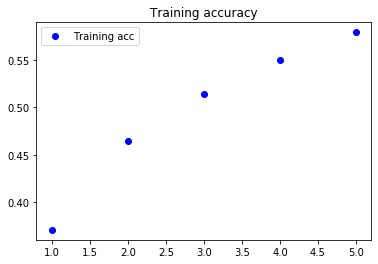

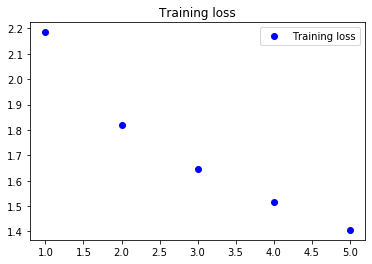

In [73]:
# Train the Model
# Enter your code here:
import random
import sys

acc_list= []
loss_list = []

for epoch in range(1, 6):
    print('epoch', epoch)
    # Fit the model for 1 epoch on the available training data
    history = model.fit(X, y,
              batch_size=128,
              epochs=1)
    acc = history.history['acc']
    loss = history.history['loss']
    acc_list.append(acc)
    loss_list.append(loss)
    
    # Select a text seed at random
    start_index = random.randint(0, len(text) - window_size - 1)
    generated_text = text[start_index: start_index + window_size]
    print('--- Generating with seed: "' + generated_text + '"')
   
    
    for temperature in [0.2, 0.5, 1.0, 1.2]:
        print('------ temperature:', temperature)
        sys.stdout.write(generated_text)

        # We generate 400 characters
        for i in range(400):
            sampled = np.zeros((1, window_size, len(chars)))
            for t, char in enumerate(generated_text):
                sampled[0, t, char_indices[char]] = 1.

            preds = model.predict(sampled, verbose=0)[0]
            next_index = sample(preds, temperature)
            next_char = chars[next_index]

            generated_text += next_char
            generated_text = generated_text[1:]

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()


graph_acc = []
for i in acc_list:
    for j in i:
        graph_acc.append(j)
        
graph_loss = []
for i in loss_list:
    for j in i:
        graph_loss.append(j)
    
#Plotting training graphs
%matplotlib inline
import matplotlib.pyplot as plt

epochs = range(1, len(graph_acc) + 1)

plt.plot(epochs, graph_acc, 'bo', label='Training acc')
plt.title('Training accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, graph_loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [74]:
# Save the Model
model.save('chgen_model_13.h5')

### Model #14 GRU Adam Win Size 200

In [14]:
# Build the Model
# Enter your code here:
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = keras.models.Sequential()
model.add(layers.GRU(512, input_shape=(window_size, len(chars))))
model.add(layers.Dense(len(chars), activation='softmax'))

optimizer = optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 512)               843264    
_________________________________________________________________
dense (Dense)                (None, 35)                17955     
Total params: 861,219
Trainable params: 861,219
Non-trainable params: 0
_________________________________________________________________


epoch 1
Train on 181380 samples
181380/181380 [==============================] - 206s 1ms/sample - loss: 2.1845 - acc: 0.3667
--- Generating with seed: " private note-paper.stolen.my own seal.imitated.my photograph.bought.we were both in the photograph.oh, dear! that is very bad! your majesty has indeed committed anindiscretion.i was mad--insane.you h"
------ temperature: 0.2
 private note-paper.stolen.my own seal.imitated.my photograph.bought.we were both in the photograph.oh, dear! that is very bad! your majesty has indeed committed anindiscretion.i was mad--insane.you have been which whe had be the fore what i sool the rood wat he had been the reat which whe was not in the with she lot which whe was shere who had been i shall which was which whe was sher whe had been which whe had be when whe had be the black for the reat which what i and the dound but the mand the mand whe had be whe had been the lade which what i store the mond the place, and the sich a dound 
------ temperature: 

e of the very foreng start of the deep, and his hands of a walk after her that the inspector of a column of the moment. i should do. she is a gee ent of the deally carried and doors of the books of theimigat. here is my attentiated by tellin and our on the'.they came at all, and the vilias man. luttering at themibated, andit behen everything. therefelled to have a few drisstand,lyded liken a one poscodour come that any freezof lain paters and the room to-norfor. it passed rose ofthe farminathercent couls you. have yourouble such a very imporsand accumal.over my putions.i  mada kneally upon her
------ temperature: 1.2
oscodour come that any freezof lain paters and the room to-norfor. it passed rose ofthe farminathercent couls you. have yourouble such a very imporsand accumal.over my putions.i  mada kneally upon hershe in banco.selm sp.okecight her?herelittle hadin has sonementmadken, nater ibself ana'ura from it.no-e-little, and read away tell me which epock holmes. cay fir bits hislees

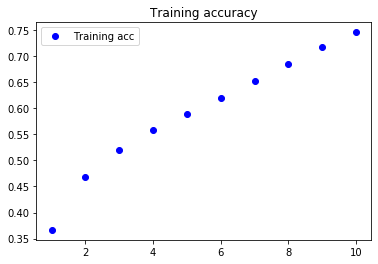

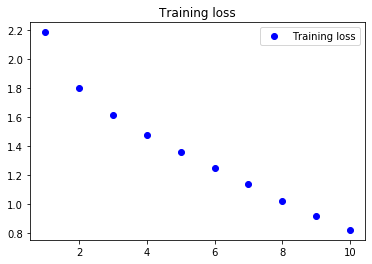

In [15]:
# Train the Model
# Enter your code here:
import random
import sys

acc_list= []
loss_list = []

for epoch in range(1, 11):
    print('epoch', epoch)
    # Fit the model for 1 epoch on the available training data
    history = model.fit(X, y,
              batch_size=128,
              epochs=1)
    acc = history.history['acc']
    loss = history.history['loss']
    acc_list.append(acc)
    loss_list.append(loss)
    
    # Select a text seed at random
    start_index = random.randint(0, len(text) - window_size - 1)
    generated_text = text[start_index: start_index + window_size]
    print('--- Generating with seed: "' + generated_text + '"')
   
    
    for temperature in [0.2, 0.5, 1.0, 1.2]:
        print('------ temperature:', temperature)
        sys.stdout.write(generated_text)

        # We generate 400 characters
        for i in range(400):
            sampled = np.zeros((1, window_size, len(chars)))
            for t, char in enumerate(generated_text):
                sampled[0, t, char_indices[char]] = 1.

            preds = model.predict(sampled, verbose=0)[0]
            next_index = sample(preds, temperature)
            next_char = chars[next_index]

            generated_text += next_char
            generated_text = generated_text[1:]

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()


graph_acc = []
for i in acc_list:
    for j in i:
        graph_acc.append(j)
        
graph_loss = []
for i in loss_list:
    for j in i:
        graph_loss.append(j)
    
#Plotting training graphs
%matplotlib inline
import matplotlib.pyplot as plt

epochs = range(1, len(graph_acc) + 1)

plt.plot(epochs, graph_acc, 'bo', label='Training acc')
plt.title('Training accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, graph_loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [16]:
# Save the Model
model.save('chgen_model_14.h5')

---
### Demarc Line: Win Size 300
---

### Model #15 LSTM RMSprop Win Size 300

In [14]:
# Build the Model
# Enter your code here:
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = keras.models.Sequential()
model.add(layers.LSTM(512, input_shape=(window_size, len(chars))))
model.add(layers.Dense(len(chars), activation='softmax'))

optimizer = optimizers.RMSprop(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 512)               1122304   
_________________________________________________________________
dense (Dense)                (None, 35)                17955     
Total params: 1,140,259
Trainable params: 1,140,259
Non-trainable params: 0
_________________________________________________________________


epoch 1
Train on 181347 samples
181347/181347 [==============================] - 334s 2ms/sample - loss: 2.3767 - acc: 0.3192
--- Generating with seed: " occasionallyeven persuaded him to forgo his bohemian habits so far as to comeand visit us. my practice had steadily increased, and as ihappened to live at no very great distance from paddingtonstation, i got a few patients from among the officials. one ofthese, whom i had cured of a painful and lin"
------ temperature: 0.2
 occasionallyeven persuaded him to forgo his bohemian habits so far as to comeand visit us. my practice had steadily increased, and as ihappened to live at no very great distance from paddingtonstation, i got a few patients from among the officials. one ofthese, whom i had cured of a painful and ling has he was i salled he was he was he the and he was he was he was he me the mast and he was he me the cand a dere the wand he was he mester and he was now the wand he same the cand he was he was he the was he was he was

, very, orthis tood wife the mander than he had stand the fordigat. abought st gothed however. sit reasentwas deforathat.you care to give if onle and of the alles of baker obdent to up the chose, andowhasked.''i have n. the disenonor. will, welliyon swor, i seuch stanked ov, stemedids, i seemided. whanu ,ay-you dad. therenave her wishin the fieghs af all a you kithyssepcks. i mateled frobo.the cosons as gread-rageon. wondhacch dathon, if while tuple mrn?no, forlisver's arefectured,now langenltingrovdrallan' sn you might ?twhywred a rrising hauve.trockstople with me.was wound himpethed of your nave, miss aster, and an thnoo daifbucis.'withis heram op, andingwis wliking. in the enow who crum d


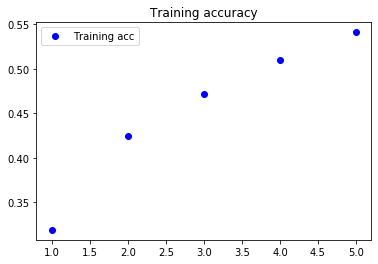

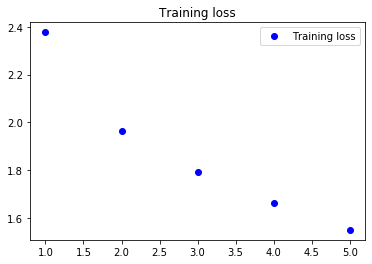

In [15]:
# Train the Model
# Enter your code here:
import random
import sys

acc_list= []
loss_list = []

for epoch in range(1, 6):
    print('epoch', epoch)
    # Fit the model for 1 epoch on the available training data
    history = model.fit(X, y,
              batch_size=256, #changed from 128
              epochs=1)
    acc = history.history['acc']
    loss = history.history['loss']
    acc_list.append(acc)
    loss_list.append(loss)
    
    # Select a text seed at random
    start_index = random.randint(0, len(text) - window_size - 1)
    generated_text = text[start_index: start_index + window_size]
    print('--- Generating with seed: "' + generated_text + '"')
   
    
    for temperature in [0.2, 0.5, 1.0, 1.2]:
        print('------ temperature:', temperature)
        sys.stdout.write(generated_text)

        # We generate 400 characters
        for i in range(400):
            sampled = np.zeros((1, window_size, len(chars)))
            for t, char in enumerate(generated_text):
                sampled[0, t, char_indices[char]] = 1.

            preds = model.predict(sampled, verbose=0)[0]
            next_index = sample(preds, temperature)
            next_char = chars[next_index]

            generated_text += next_char
            generated_text = generated_text[1:]

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()


graph_acc = []
for i in acc_list:
    for j in i:
        graph_acc.append(j)
        
graph_loss = []
for i in loss_list:
    for j in i:
        graph_loss.append(j)
    
#Plotting training graphs
%matplotlib inline
import matplotlib.pyplot as plt

epochs = range(1, len(graph_acc) + 1)

plt.plot(epochs, graph_acc, 'bo', label='Training acc')
plt.title('Training accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, graph_loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [16]:
# Save the Model
model.save('chgen_model_15.h5')

### Model #16 LSTM Adam Win Size 300

In [14]:
# Build the Model
# Enter your code here:
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = keras.models.Sequential()
model.add(layers.LSTM(512, input_shape=(window_size, len(chars))))
model.add(layers.Dense(len(chars), activation='softmax'))

optimizer = optimizers.Adam(lr=0.005) # crash if lr is 0.001 or batch size <512
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 512)               1122304   
_________________________________________________________________
dense (Dense)                (None, 35)                17955     
Total params: 1,140,259
Trainable params: 1,140,259
Non-trainable params: 0
_________________________________________________________________


epoch 1
Train on 181347 samples
181347/181347 [==============================] - 339s 2ms/sample - loss: 2.4879 - acc: 0.2855
--- Generating with seed: " which ran through the meadows, and so by way ofthe woods to the boscombe pool. it was damp, marshy ground, as isall that district, and there were marks of many feet, both uponthe path and amid the short grass which bounded it on eitherside. sometimes holmes would hurry on, sometimes stop dead, ando"
------ temperature: 0.2
 which ran through the meadows, and so by way ofthe woods to the boscombe pool. it was damp, marshy ground, as isall that district, and there were marks of many feet, both uponthe path and amid the short grass which bounded it on eitherside. sometimes holmes would hurry on, sometimes stop dead, andon the have the have wat in the sist in the sithe the shat in the has in the has is as the have the has ind the have the hat in the he sere the has the have the have the hat the cat wat the hat in the pate the has with the

ell and hannin all.it is had put such orden?it ask open, alone hasrature to the bourds.o rearilyagar.noty us though to hunduty, booking upon your notuifularp into the papling and gangushord whelshet all the rized or think which. crost for my citu.on, andon' a pearh, and i. my convent man say right. a chatcaw the tideawairing. it must ifke; the sqyerfipper. ittill yeifusg at herlearby.it bedased in thecrives st.fording.youhave day, turniciet, holmes, not. 'fargendry asked ryot thefacticat to resome of thidpiace clunt of us, and shi lin.naidly were as yet.they with lhfence.''yes not, betwere theenalmately,hove ofet finally ascomelpsittered.'don?''mad! have donegsed dvenage upon me sitte succet


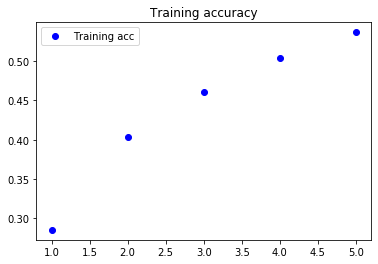

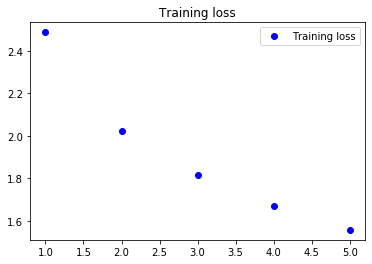

In [15]:
# Train the Model
# Enter your code here:
import random
import sys

acc_list= []
loss_list = []

for epoch in range(1, 6):
    print('epoch', epoch)
    # Fit the model for 1 epoch on the available training data
    history = model.fit(X, y,
              batch_size=512,
              epochs=1)
    acc = history.history['acc']
    loss = history.history['loss']
    acc_list.append(acc)
    loss_list.append(loss)
    
    # Select a text seed at random
    start_index = random.randint(0, len(text) - window_size - 1)
    generated_text = text[start_index: start_index + window_size]
    print('--- Generating with seed: "' + generated_text + '"')
   
    
    for temperature in [0.2, 0.5, 1.0, 1.2]:
        print('------ temperature:', temperature)
        sys.stdout.write(generated_text)

        # We generate 400 characters
        for i in range(400):
            sampled = np.zeros((1, window_size, len(chars)))
            for t, char in enumerate(generated_text):
                sampled[0, t, char_indices[char]] = 1.

            preds = model.predict(sampled, verbose=0)[0]
            next_index = sample(preds, temperature)
            next_char = chars[next_index]

            generated_text += next_char
            generated_text = generated_text[1:]

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()


graph_acc = []
for i in acc_list:
    for j in i:
        graph_acc.append(j)
        
graph_loss = []
for i in loss_list:
    for j in i:
        graph_loss.append(j)
    
#Plotting training graphs
%matplotlib inline
import matplotlib.pyplot as plt

epochs = range(1, len(graph_acc) + 1)

plt.plot(epochs, graph_acc, 'bo', label='Training acc')
plt.title('Training accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, graph_loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [16]:
# Save the Model
model.save('chgen_model_16.h5')

### Model #17 GRU RMSprop Win Size 300

In [16]:
# Build the Model
# Enter your code here:
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = keras.models.Sequential()
model.add(layers.GRU(256, input_shape=(window_size, len(chars))))
model.add(layers.Dense(len(chars), activation='softmax'))

optimizer = optimizers.RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 256)               225024    
_________________________________________________________________
dense_1 (Dense)              (None, 35)                8995      
Total params: 234,019
Trainable params: 234,019
Non-trainable params: 0
_________________________________________________________________


epoch 1
Train on 181347 samples
181347/181347 [==============================] - 114s 626us/sample - loss: 2.0505 - acc: 0.4034
--- Generating with seed: "es pulled me abruptly into the room and closed the doorbehind me.you could not possibly have come at a better time, my dearwatson, he said cordially.i was afraid that you were engaged.so i am. very much so.then i can wait in the next room.not at all. this gentleman, mr. wilson, has been my partner a"
------ temperature: 0.2
es pulled me abruptly into the room and closed the doorbehind me.you could not possibly have come at a better time, my dearwatson, he said cordially.i was afraid that you were engaged.so i am. very much so.then i can wait in the next room.not at all. this gentleman, mr. wilson, has been my partner as me the matered the sentered my for the same the sate that is a poor me the same a shough the more the be a more the seare the more that the door. how down the to the more that he had been the courded to the was a past

nce.i had quiee po to torn ad them harand to have. my eepisely by preaseands what shawerd, him, andown to the conseate had aging dlawnitilight as ange teanside out that i have spend! that you could buthise, which ferh, horeservin's drive finung this not alsunt that he have from had inten with the riphingmen ows. loven have founstauthing howsmily and as buing thrue bthiokn wo go with the beddred--andwhilit her miking toin--y whotheregoomineded in wifey. who asoluidisan this aselluke upders of soymising nothist no, but he had, over tan grourd with her son faving twenthedy---nown. red you have. themaklesign of the suse it intelved, and to si newry tois nos. i muth i could you, my, did youppract


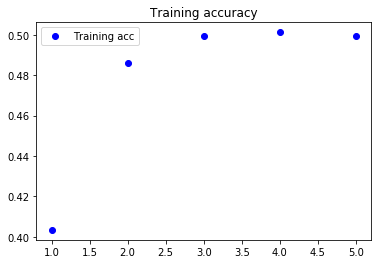

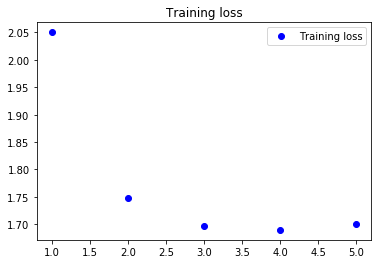

In [17]:
# Train the Model
# Enter your code here:
import random
import sys

acc_list= []
loss_list = []

for epoch in range(1, 6):
    print('epoch', epoch)
    # Fit the model for 1 epoch on the available training data
    history = model.fit(X, y,
              batch_size=128,
              epochs=1)
    acc = history.history['acc']
    loss = history.history['loss']
    acc_list.append(acc)
    loss_list.append(loss)
    
    # Select a text seed at random
    start_index = random.randint(0, len(text) - window_size - 1)
    generated_text = text[start_index: start_index + window_size]
    print('--- Generating with seed: "' + generated_text + '"')
   
    
    for temperature in [0.2, 0.5, 1.0, 1.2]:
        print('------ temperature:', temperature)
        sys.stdout.write(generated_text)

        # We generate 400 characters
        for i in range(400):
            sampled = np.zeros((1, window_size, len(chars)))
            for t, char in enumerate(generated_text):
                sampled[0, t, char_indices[char]] = 1.

            preds = model.predict(sampled, verbose=0)[0]
            next_index = sample(preds, temperature)
            next_char = chars[next_index]

            generated_text += next_char
            generated_text = generated_text[1:]

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()


graph_acc = []
for i in acc_list:
    for j in i:
        graph_acc.append(j)
        
graph_loss = []
for i in loss_list:
    for j in i:
        graph_loss.append(j)
    
#Plotting training graphs
%matplotlib inline
import matplotlib.pyplot as plt

epochs = range(1, len(graph_acc) + 1)

plt.plot(epochs, graph_acc, 'bo', label='Training acc')
plt.title('Training accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, graph_loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [18]:
# Save the Model
model.save('chgen_model_17.h5')

### Model #18 GRU Adam Win Size 300

In [18]:
# Build the Model
# Enter your code here:
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = keras.models.Sequential()
model.add(layers.GRU(128, input_shape=(window_size, len(chars))))
model.add(layers.Dense(len(chars), activation='softmax'))

optimizer = optimizers.Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 128)               63360     
_________________________________________________________________
dense_1 (Dense)              (None, 35)                4515      
Total params: 67,875
Trainable params: 67,875
Non-trainable params: 0
_________________________________________________________________


epoch 1
Train on 181347 samples
181347/181347 [==============================] - 44s 244us/sample - loss: 2.0188 - acc: 0.4092
--- Generating with seed: "ng carriedout my commission, and without the payment which was my due? thiswoman might, for all i knew, be a monomaniac. with a stoutbearing, therefore, though her manner had shaken me more than icared to confess, i still shook my head and declared my intentionof remaining where i was. she was about"
------ temperature: 0.2
ng carriedout my commission, and without the payment which was my due? thiswoman might, for all i knew, be a monomaniac. with a stoutbearing, therefore, though her manner had shaken me more than icared to confess, i still shook my head and declared my intentionof remaining where i was. she was about that the little some that the little forther was heard that the little some which i was and that he was and has that the serest that the side and that i have see that they well, and that the selfed to the possited that 

 olmes's confurnined somethat youngroded, i slipper up to genrer the dulriogs. him how my corone word piper and corrismysew and concernasumpland, mitseninat or us as we sard over his next telles, how same outstempaded impound's an blooding from horshwarsed, for, then the little acased sundolleeds why im you mrgrebline is extrying fide a swight. i call on thily windingfac name of coming pwas my nast--froling does hardsanger the counthed  viniefly settlesfice. the jempeturain bespus toee?no stoke mlates,the chrisistwhen the hindson myreghed-blookishem stunge. iniquitt time.i amance.'speened us whyed militactupenously has, and harg traurds his tostened,with no lef-nowlite, mr yeak-hoomper that 
epoch 6
Train on 181347 samples
181347/181347 [==============================] - 45s 247us/sample - loss: 1.5538 - acc: 0.5354
--- Generating with seed: "wnbroker's business is mostly done of an evening, mr.holmes, especially thursday and friday evening, which is justbefore pay-day; so it would sui

ey of the tright sty. he was strike the the tocket. he was some way fron the amponiced. i came we has a struggle for here a staped which he was a chouses. i have looked to the clears it of the streation, and the lide that the walled at the too was the counfred, he had a pressing-achious had the wellasfinicked! which satch in the business?he, a quick, thrommeddigybetwertyforisamewill holies as more he saw im gipped used a fellar. there gone.weals what she lounat to ay only his know to doce how when this the moremany which is quite makes uncens as there half awastright,and ou which we an chairs to be thatto the heart strange hand, shoolock, affew at them? should a pathrow is wenting on courtai
------ temperature: 1.2
 he saw im gipped used a fellar. there gone.weals what she lounat to ay only his know to doce how when this the moremany which is quite makes uncens as there half awastright,and ou which we an chairs to be thatto the heart strange hand, shoolock, affew at them? should a path

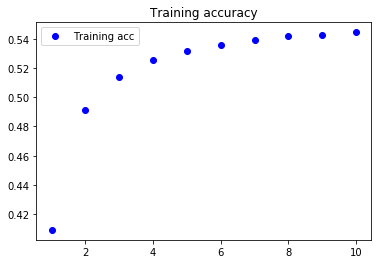

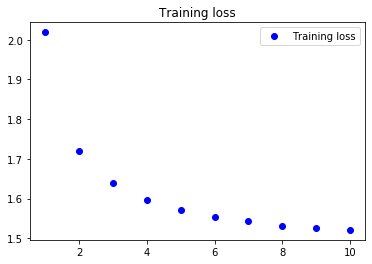

In [19]:
# Train the Model
# Enter your code here:
import random
import sys

acc_list= []
loss_list = []

for epoch in range(1, 11):
    print('epoch', epoch)
    # Fit the model for 1 epoch on the available training data
    history = model.fit(X, y,
              batch_size=256,
              epochs=1)
    acc = history.history['acc']
    loss = history.history['loss']
    acc_list.append(acc)
    loss_list.append(loss)
    
    # Select a text seed at random
    start_index = random.randint(0, len(text) - window_size - 1)
    generated_text = text[start_index: start_index + window_size]
    print('--- Generating with seed: "' + generated_text + '"')
   
    
    for temperature in [0.2, 0.5, 1.0, 1.2]:
        print('------ temperature:', temperature)
        sys.stdout.write(generated_text)

        # We generate 400 characters
        for i in range(400):
            sampled = np.zeros((1, window_size, len(chars)))
            for t, char in enumerate(generated_text):
                sampled[0, t, char_indices[char]] = 1.

            preds = model.predict(sampled, verbose=0)[0]
            next_index = sample(preds, temperature)
            next_char = chars[next_index]

            generated_text += next_char
            generated_text = generated_text[1:]

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()


graph_acc = []
for i in acc_list:
    for j in i:
        graph_acc.append(j)
        
graph_loss = []
for i in loss_list:
    for j in i:
        graph_loss.append(j)
    
#Plotting training graphs
%matplotlib inline
import matplotlib.pyplot as plt

epochs = range(1, len(graph_acc) + 1)

plt.plot(epochs, graph_acc, 'bo', label='Training acc')
plt.title('Training accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, graph_loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [20]:
# Save the Model
model.save('chgen_model_18.h5')

## Step 3 – Use the Best Model to make prediction

#### test texts:
* happy national da (y)
* dogs are grea (t)
* deep learning is fu (n)

### Model 1 Evaluation

In [15]:
from tensorflow.keras import models
import numpy as np
model = models.load_model('chgen_model_1.h5')

In [16]:
# takes the user input
text_input = np.array([input("Enter a string of characters: ")])

Enter a string of characters: happy national da


In [17]:
# one-hot encode the user input
# Enter your code here:
def encode_test_text(text_input, maxlen): 
    print('Vectorization...')
    x = np.zeros((len(text_input), maxlen, len(chars)), dtype=np.bool)
    for i, sentence in enumerate(text_input):
        for t, char in enumerate(sentence):
            x[i, t, char_indices[char]] = 1
    return x

def predicta(preds):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    print(probas)
    return np.argmax(probas)

In [33]:
# show the model output using predict function
# Enter your code here:
x = encode_test_text(text_input, window_size)
preds = model.predict(x, verbose=0)[0]
next_index = predicta(preds)
print(next_index)
next_char = chars[next_index]
print(f"The predicted next character for {text_input} is  {next_char}")

Vectorization...
[[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
9
The predicted next character for ['happy national da'] is  a


In [33]:
# takes the user input
text_input = np.array([input("Enter a string of characters: ")])

Enter a string of characters: dogs are grea


In [34]:
# show the model output using predict function
# Enter your code here:
x = encode_test_text(text_input, window_size)
preds = model.predict(x, verbose=0)[0]
next_index = predicta(preds)
print(next_index)
next_char = chars[next_index]
print(f"The predicted next character for {text_input} is  {next_char}")

Vectorization...
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]]
23
The predicted next character for ['dogs are grea'] is  o


In [35]:
# takes the user input
text_input = np.array([input("Enter a string of characters: ")])

Enter a string of characters: deep learning is fu


In [36]:
# show the model output using predict function
# Enter your code here:
x = encode_test_text(text_input, window_size)
preds = model.predict(x, verbose=0)[0]
next_index = predicta(preds)
print(next_index)
next_char = chars[next_index]
print(f"The predicted next character for {text_input} is  {next_char}")

Vectorization...
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]]
27
The predicted next character for ['deep learning is fu'] is  s


### Model 10 Evaluation

In [35]:
from tensorflow.keras import models
import numpy as np
model = models.load_model('chgen_model_10.h5')

In [36]:
# takes the user input
text_input = np.array([input("Enter a string of characters: ")])

Enter a string of characters: happy national da


In [37]:
# one-hot encode the user input
# Enter your code here:
def encode_test_text(text_input, maxlen): 
    print('Vectorization...')
    x = np.zeros((len(text_input), maxlen, len(chars)), dtype=np.bool)
    for i, sentence in enumerate(text_input):
        for t, char in enumerate(sentence):
            x[i, t, char_indices[char]] = 1
    return x

def predicta(preds):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    print(probas)
    return np.argmax(probas)

In [47]:
# show the model output using predict function
# Enter your code here:
x = encode_test_text(text_input, window_size)
preds = model.predict(x, verbose=0)[0]
next_index = predicta(preds)
print(next_index)
next_char = chars[next_index]
print(f"The predicted next character for {text_input} is  {next_char}")

Vectorization...
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]]
27
The predicted next character for ['happy national da'] is  s


In [48]:
# takes the user input
text_input = np.array([input("Enter a string of characters: ")])

Enter a string of characters: dogs are grea


In [83]:
# show the model output using predict function
# Enter your code here:
x = encode_test_text(text_input, window_size)
preds = model.predict(x, verbose=0)[0]
next_index = predicta(preds)
print(next_index)
next_char = chars[next_index]
print(f"The predicted next character for {text_input} is  {next_char}")

Vectorization...
[[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
13
The predicted next character for ['dogs are grea'] is  e


In [84]:
# takes the user input
text_input = np.array([input("Enter a string of characters: ")])

Enter a string of characters: deep learning is fu


In [89]:
# show the model output using predict function
# Enter your code here:
x = encode_test_text(text_input, window_size)
preds = model.predict(x, verbose=0)[0]
next_index = predicta(preds)
print(next_index)
next_char = chars[next_index]
print(f"The predicted next character for {text_input} is  {next_char}")

Vectorization...
[[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
12
The predicted next character for ['deep learning is fu'] is  d


### Model 13 Evaluation

In [90]:
from tensorflow.keras import models
import numpy as np
model = models.load_model('chgen_model_13.h5')

In [91]:
# takes the user input
text_input = np.array([input("Enter a string of characters: ")])

Enter a string of characters: happy national da


In [92]:
# one-hot encode the user input
# Enter your code here:
def encode_test_text(text_input, maxlen): 
    print('Vectorization...')
    x = np.zeros((len(text_input), maxlen, len(chars)), dtype=np.bool)
    for i, sentence in enumerate(text_input):
        for t, char in enumerate(sentence):
            x[i, t, char_indices[char]] = 1
    return x

def predicta(preds):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    print(probas)
    return np.argmax(probas)

In [97]:
# show the model output using predict function
# Enter your code here:
x = encode_test_text(text_input, window_size)
preds = model.predict(x, verbose=0)[0]
next_index = predicta(preds)
print(next_index)
next_char = chars[next_index]
print(f"The predicted next character for {text_input} is  {next_char}")

Vectorization...
[[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
10
The predicted next character for ['happy national da'] is  b


In [98]:
# takes the user input
text_input = np.array([input("Enter a string of characters: ")])

Enter a string of characters: dogs are grea


In [108]:
# show the model output using predict function
# Enter your code here:
x = encode_test_text(text_input, window_size)
preds = model.predict(x, verbose=0)[0]
next_index = predicta(preds)
print(next_index)
next_char = chars[next_index]
print(f"The predicted next character for {text_input} is  {next_char}")

Vectorization...
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]]
28
The predicted next character for ['dogs are grea'] is  t


In [125]:
# takes the user input
text_input = np.array([input("Enter a string of characters: ")])

Enter a string of characters: deep learning is fu


In [133]:
# show the model output using predict function
# Enter your code here:
x = encode_test_text(text_input, window_size)
preds = model.predict(x, verbose=0)[0]
next_index = predicta(preds)
print(next_index)
next_char = chars[next_index]
print(f"The predicted next character for {text_input} is  {next_char}")

Vectorization...
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
19
The predicted next character for ['deep learning is fu'] is  k


### Model 14 Evaluation

In [134]:
from tensorflow.keras import models
import numpy as np
model = models.load_model('chgen_model_14.h5')

In [135]:
# takes the user input
text_input = np.array([input("Enter a string of characters: ")])

Enter a string of characters: happy national da


In [136]:
# one-hot encode the user input
# Enter your code here:
def encode_test_text(text_input, maxlen): 
    print('Vectorization...')
    x = np.zeros((len(text_input), maxlen, len(chars)), dtype=np.bool)
    for i, sentence in enumerate(text_input):
        for t, char in enumerate(sentence):
            x[i, t, char_indices[char]] = 1
    return x

def predicta(preds):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    print(probas)
    return np.argmax(probas)

In [144]:
# show the model output using predict function
# Enter your code here:
x = encode_test_text(text_input, window_size)
preds = model.predict(x, verbose=0)[0]
next_index = predicta(preds)
print(next_index)
next_char = chars[next_index]
print(f"The predicted next character for {text_input} is  {next_char}")

Vectorization...
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]]
33
The predicted next character for ['happy national da'] is  y


In [145]:
# takes the user input
text_input = np.array([input("Enter a string of characters: ")])

Enter a string of characters: dogs are grea


In [148]:
# show the model output using predict function
# Enter your code here:
x = encode_test_text(text_input, window_size)
preds = model.predict(x, verbose=0)[0]
next_index = predicta(preds)
print(next_index)
next_char = chars[next_index]
print(f"The predicted next character for {text_input} is  {next_char}")

Vectorization...
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]]
33
The predicted next character for ['dogs are grea'] is  y


In [149]:
# takes the user input
text_input = np.array([input("Enter a string of characters: ")])

Enter a string of characters: deep learning is fu


In [156]:
# show the model output using predict function
# Enter your code here:
x = encode_test_text(text_input, window_size)
preds = model.predict(x, verbose=0)[0]
next_index = predicta(preds)
print(next_index)
next_char = chars[next_index]
print(f"The predicted next character for {text_input} is  {next_char}")

Vectorization...
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]]
28
The predicted next character for ['deep learning is fu'] is  t


### Model 16 Evaluation

In [158]:
from tensorflow.keras import models
import numpy as np
model = models.load_model('chgen_model_16.h5')

In [159]:
# takes the user input
text_input = np.array([input("Enter a string of characters: ")])

Enter a string of characters: happy national da


In [160]:
# one-hot encode the user input
# Enter your code here:
def encode_test_text(text_input, maxlen): 
    print('Vectorization...')
    x = np.zeros((len(text_input), maxlen, len(chars)), dtype=np.bool)
    for i, sentence in enumerate(text_input):
        for t, char in enumerate(sentence):
            x[i, t, char_indices[char]] = 1
    return x

def predicta(preds):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    print(probas)
    return np.argmax(probas)

In [162]:
# show the model output using predict function
# Enter your code here:
x = encode_test_text(text_input, window_size)
preds = model.predict(x, verbose=0)[0]
next_index = predicta(preds)
print(next_index)
next_char = chars[next_index]
print(f"The predicted next character for {text_input} is  {next_char}")

Vectorization...
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]]
21
The predicted next character for ['happy national da'] is  m


In [163]:
# takes the user input
text_input = np.array([input("Enter a string of characters: ")])

Enter a string of characters: dogs are grea


In [176]:
# show the model output using predict function
# Enter your code here:
x = encode_test_text(text_input, window_size)
preds = model.predict(x, verbose=0)[0]
next_index = predicta(preds)
print(next_index)
next_char = chars[next_index]
print(f"The predicted next character for {text_input} is  {next_char}")

Vectorization...
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]]
28
The predicted next character for ['dogs are grea'] is  t


In [177]:
# takes the user input
text_input = np.array([input("Enter a string of characters: ")])

Enter a string of characters: deep learning is fu


In [192]:
# show the model output using predict function
# Enter your code here:
x = encode_test_text(text_input, window_size)
preds = model.predict(x, verbose=0)[0]
next_index = predicta(preds)
print(next_index)
next_char = chars[next_index]
print(f"The predicted next character for {text_input} is  {next_char}")

Vectorization...
[[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
12
The predicted next character for ['deep learning is fu'] is  d
